In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from file
times = []
amplitudes = []

with open('/Users/orlink/eda/designs/xtal/simulations/osc_data.txt', 'r') as file:  # Replace 'your_file.txt' with your filename
    # Skip the header line
    next(file)
    for line in file:
        # Skip empty lines
        if line.strip():
            time, amplitude = line.split()
            times.append(float(time))
            amplitudes.append(float(amplitude))

Original signal: 1688159 samples
Time window segment: 2251 samples
Segment duration: 0.002 seconds
Segment time range: 1.000 to 1.002 seconds


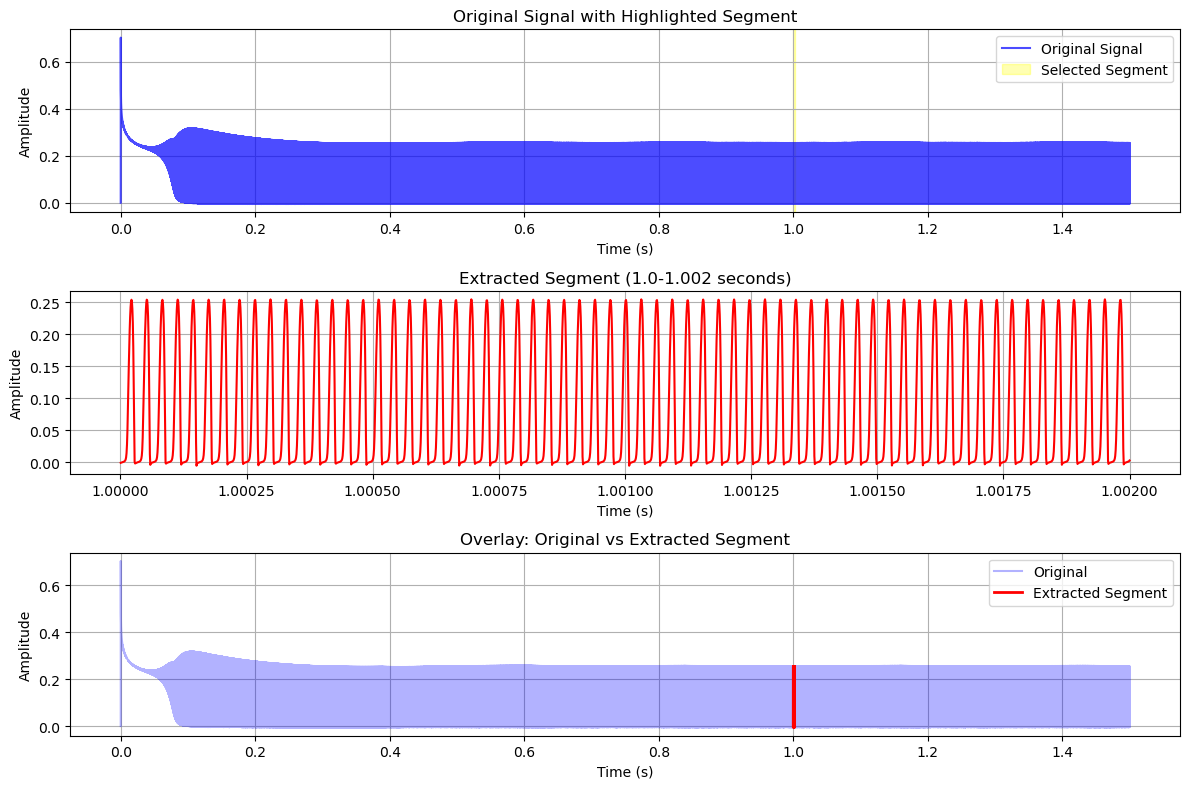

In [10]:
times_array = np.array(times)
amplitudes_array = np.array(amplitudes)

# Define the time window of interest
start_time = 1.0  # Start of the segment you want (in seconds)
end_time = 1.002    # End of the segment you want (in seconds)

# Create mask for the time window of interest
time_window_mask = (times_array >= start_time) & (times_array <= end_time)

# Extract the signal segment of interest
times_segment = times_array[time_window_mask]
amplitudes_segment = amplitudes_array[time_window_mask]

# Optional: Also keep your original cutoff (if you still need it)
cutoff_time = 0.4  # Your original cutoff
cutoff_mask = times_array >= cutoff_time
times_cut = times_array[cutoff_mask]
amplitudes_cut = amplitudes_array[cutoff_mask]

# Print information about the extracted segment
print(f"Original signal: {len(times_array)} samples")
print(f"Time window segment: {len(times_segment)} samples")
print(f"Segment duration: {times_segment[-1] - times_segment[0]:.3f} seconds")
print(f"Segment time range: {times_segment[0]:.3f} to {times_segment[-1]:.3f} seconds")

# Plot comparison: Original vs Extracted Segment
plt.figure(figsize=(12, 8))

# Plot 1: Original full signal
plt.subplot(3, 1, 1)
plt.plot(times_array, amplitudes_array, 'b-', alpha=0.7, label='Original Signal')
plt.axvspan(start_time, end_time, color='yellow', alpha=0.3, label='Selected Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal with Highlighted Segment')
plt.legend()
plt.grid(True)

# Plot 2: Extracted segment only
plt.subplot(3, 1, 2)
plt.plot(times_segment, amplitudes_segment, 'r-', linewidth=1.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Extracted Segment ({start_time}-{end_time} seconds)')
plt.grid(True)

# Plot 3: Overlay comparison
plt.subplot(3, 1, 3)
plt.plot(times_array, amplitudes_array, 'b-', alpha=0.3, label='Original')
plt.plot(times_segment, amplitudes_segment, 'r-', linewidth=2, label='Extracted Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Overlay: Original vs Extracted Segment')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

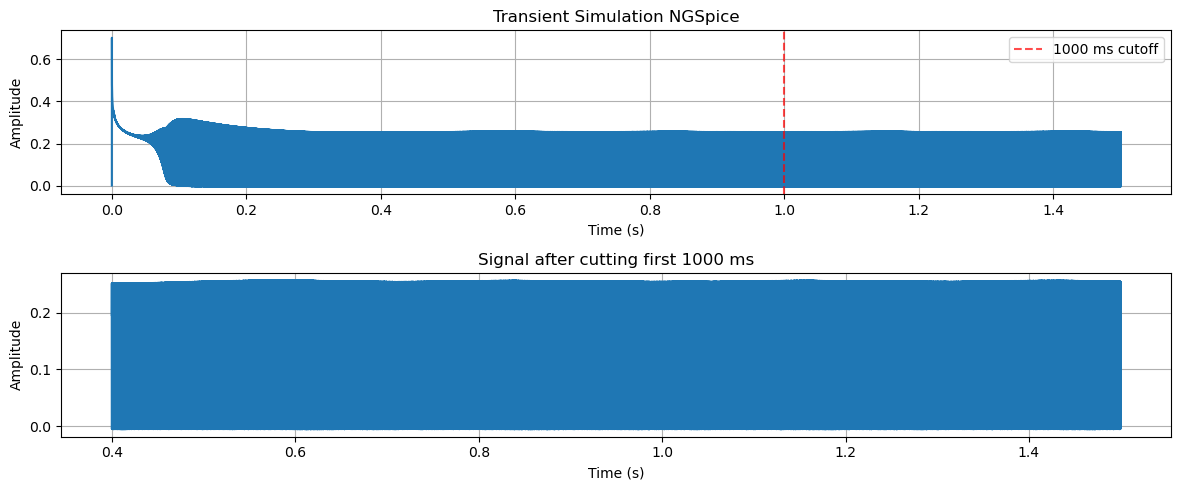

Original signal duration: 1.500 s
Cut signal duration: 1.100 s
Removed 450175 samples


In [11]:
# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(2, 1, 1)
plt.plot(times, amplitudes)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Transient Simulation NGSpice')
plt.grid(True)
plt.axvline(x=1.0, color='r', linestyle='--', alpha=0.7, label='1000 ms cutoff')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(times_cut, amplitudes_cut)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal after cutting first 1000 ms')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Original signal duration: {times[-1]:.3f} s")
print(f"Cut signal duration: {times_cut[-1] - times_cut[0]:.3f} s")
print(f"Removed {len(times) - len(times_cut)} samples")

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Compute FFT
sampling_rate = 1 / (times[1] - times[0])
n = len(amplitudes_cut)
yf = fft(amplitudes_cut)
xf = fftfreq(n, 1 / sampling_rate)

# Take only positive frequencies
positive_freq_idx = np.where(xf >= 0)
xf_positive = xf[positive_freq_idx]
yf_positive = 2.0/n * np.abs(yf[positive_freq_idx])

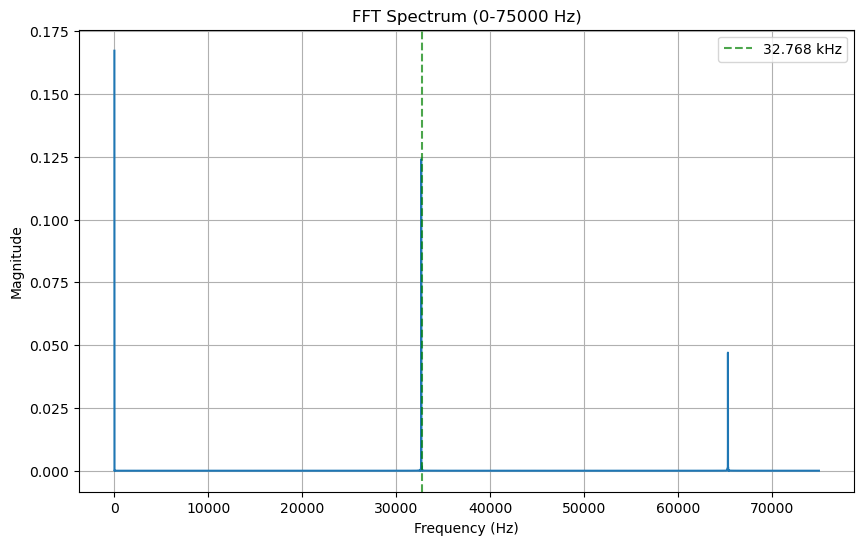

In [13]:
# Define frequency range of interest
freq_min = 0
freq_max = 75000  # Hz

# Filter frequencies within our range of interest
mask = (xf_positive >= freq_min) & (xf_positive <= freq_max)
xf_filtered = xf_positive[mask]
yf_filtered = yf_positive[mask]

# Plot the narrowed frequency range
plt.figure(figsize=(10, 6))
plt.plot(xf_filtered, yf_filtered)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title(f'FFT Spectrum ({freq_min}-{freq_max} Hz)')
plt.axvline(x=32768, color='g', linestyle='--', alpha=0.7, label='32.768 kHz')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
# Optional: Print peak frequencies
peaks = np.argsort(yf_positive)[-10:]  # Top 10 peaks
print("Top 5 frequency components:")
for peak in peaks[::-1]:  # Print from highest to lowest
    if yf_positive[peak] > 0.01 * np.max(yf_positive):  # Only significant peaks
        print(f"Frequency: {xf_positive[peak]:.2f} Hz, Magnitude: {yf_positive[peak]:.4f}")

Top 5 frequency components:
Frequency: 0.00 Hz, Magnitude: 0.1672
Frequency: 32657.25 Hz, Magnitude: 0.1240
Frequency: 65314.51 Hz, Magnitude: 0.0470
Frequency: 32658.16 Hz, Magnitude: 0.0196
Frequency: 65315.42 Hz, Magnitude: 0.0174
Frequency: 32656.34 Hz, Magnitude: 0.0152
Frequency: 65313.60 Hz, Magnitude: 0.0104
Frequency: 32659.07 Hz, Magnitude: 0.0092
Frequency: 130629.92 Hz, Magnitude: 0.0089
Frequency: 97971.76 Hz, Magnitude: 0.0089
